# INSTALAÇÃO DE BIBLIOTECAS NECESSÁRIAS

In [18]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install scipy
# %pip install seaborn
# %pip install scikit-learn

# INFORMAÇÕES BÁSICAS
Carregando os dados e mostrando informações básicas do dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random as rd
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

df = pd.read_csv(r'C:\Users\guilh\Desktop\Projects\MineracaoDeDados\Projeto\main\data\processed\loan_approval_dataset.csv')

display(df.head(5))
print('COLUNAS:')
print(list(df.columns))
print('INFOS:')
df.info()

,QtdDependentes,NivelDeEducacao,EstaEmpregado,RendaAnual,ValorDoEmprestimo,PeriodoDePagamento,ScoreCivil,ValorPossesImobiliarias,ValorPossesComerciais,ValorPossesLuxuosas,ValorPossesFinanceiras,StatusDoEmprestimo
0,0,0,1,-0.311364,-0.297962,8,417,-0.730512,-0.622704,-0.673448,-0.493590,0
1,3,1,0,1.501660,1.663530,20,506,-0.013423,-0.075652,2.053095,2.505374,0
2,3,1,0,1.175316,1.775615,8,467,1.795598,-0.361070,0.940220,0.958540,0
3,5,0,1,1.755483,1.047061,20,382,0.850344,0.804387,1.619074,0.043067,0
4,0,1,1,-0.057541,-0.152251,10,319,-0.062316,0.828172,-0.128139,0.074635,0


COLUNAS:
['QtdDependentes', 'NivelDeEducacao', 'EstaEmpregado', 'RendaAnual', 'ValorDoEmprestimo', 'PeriodoDePagamento', 'ScoreCivil', 'ValorPossesImobiliarias', 'ValorPossesComerciais', 'ValorPossesLuxuosas', 'ValorPossesFinanceiras', 'StatusDoEmprestimo']
INFOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   QtdDependentes           4173 non-null   int64  
 1   NivelDeEducacao          4173 non-null   int64  
 2   EstaEmpregado            4173 non-null   int64  
 3   RendaAnual               4173 non-null   float64
 4   ValorDoEmprestimo        4173 non-null   float64
 5   PeriodoDePagamento       4173 non-null   int64  
 6   ScoreCivil               4173 non-null   int64  
 7   ValorPossesImobiliarias  4173 non-null   float64
 8   ValorPossesComerciais    4173 non-null   float64
 9   ValorPossesLuxuosas      4173

# DIVIDIR BASE EM TREINO E TESTE

In [2]:
treino_X, teste_X, treino_Y, teste_Y = train_test_split(
    df.drop(columns='StatusDoEmprestimo'),
    df[['StatusDoEmprestimo']],
    train_size = 0.75, 
    test_size = 0.25, 
    random_state = 2103)

print(f'Linhas na base de treino: {len(treino_X)}')
print(f'Linhas na base de teste: {len(teste_X)}')

Linhas na base de treino: 3129
Linhas na base de teste: 1044


# TREINAR MODELOS

### RANDOM FOREST
Execução básica

C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acuracia: 98.47%
Precisao: 97.99%
Revocacao: 99.53%


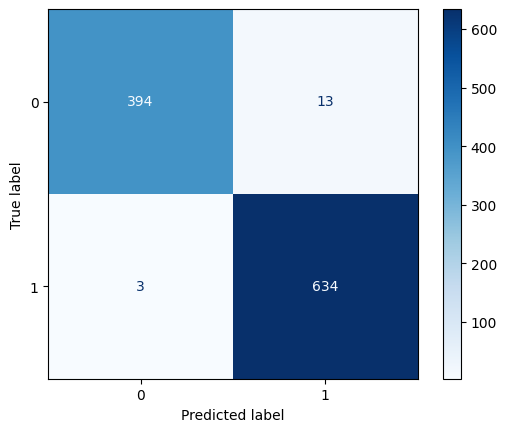

In [3]:
rf = RandomForestClassifier()
rf.fit(treino_X, treino_Y)

pred_Y = rf.predict(teste_X)

# Create the confusion matrix
matriz_confusao = confusion_matrix(teste_Y, pred_Y)

ConfusionMatrixDisplay(confusion_matrix = matriz_confusao).plot(cmap=plt.cm.Blues)

acuracia = accuracy_score(teste_Y, pred_Y)
precisao = precision_score(teste_Y, pred_Y)
revocacao = recall_score(teste_Y, pred_Y)

print(f"Acuracia: {round(acuracia*100,2)}%")
print(f"Precisao: {round(precisao*100,2)}%")
print(f"Revocacao: {round(revocacao*100,2)}%")

,Importância da Feature
ScoreCivil,0.810093
PeriodoDePagamento,0.058786
ValorDoEmprestimo,0.028398
RendaAnual,0.018723
ValorPossesLuxuosas,0.018670
ValorPossesImobiliarias,0.018470
ValorPossesComerciais,0.017400
ValorPossesFinanceiras,0.016166
QtdDependentes,0.008280
EstaEmpregado,0.002554


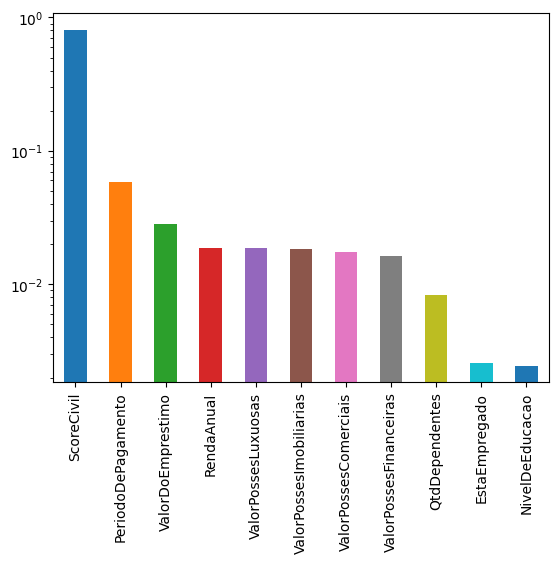

In [4]:
importancia_variaveis = pd.Series(rf.feature_importances_, index=treino_X.columns).sort_values(ascending=False)

cmap = plt.cm.tab10
colors = cmap(np.arange(len(importancia_variaveis)) % cmap.N)

importancia_variaveis = importancia_variaveis.plot.bar(logy=True, color=colors)

display(pd.DataFrame(rf.feature_importances_, columns=['Importância da Feature'], index=treino_X.columns).sort_values(by='Importância da Feature', ascending=False))

Tunagem de Hiperparametros com Validação Cruzada

In [6]:
parametros = {
            'n_estimators': list(range(1,101)), 
            'max_depth': list(range(1,11)),
            'max_leaf_nodes': list(range(1,101))
        }

rf = RandomForestClassifier()

testes = RandomizedSearchCV(rf, param_distributions = parametros, n_iter = 10, cv = 5)

testes.fit(treino_X, treino_Y)

C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

Melhores hyperparametros: {'n_estimators': 54, 'max_leaf_nodes': 61, 'max_depth': 10}
Acuracia: 98.28%
Precisao: 97.84%
Revocacao: 99.37%


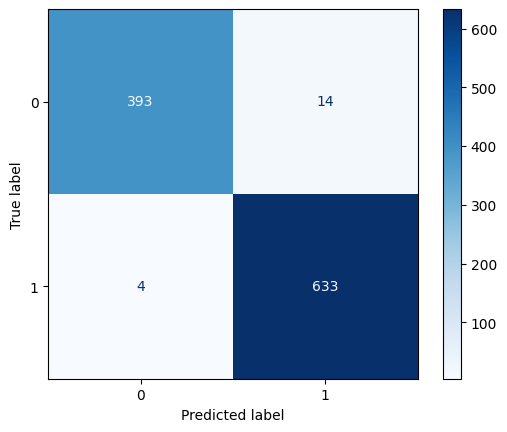

In [7]:
melhor = testes.best_estimator_

print('Melhores hyperparametros:',  testes.best_params_)

pred_Y = melhor.predict(teste_X)

# Create the confusion matrix
matriz_confusao = confusion_matrix(teste_Y, pred_Y)

acuracia = accuracy_score(teste_Y, pred_Y)
precisao = precision_score(teste_Y, pred_Y)
revocacao = recall_score(teste_Y, pred_Y)

print(f"Acuracia: {round(acuracia*100,2)}%")
print(f"Precisao: {round(precisao*100,2)}%")
print(f"Revocacao: {round(revocacao*100,2)}%")

ConfusionMatrixDisplay(confusion_matrix = matriz_confusao).plot(cmap=plt.cm.Blues)

,Importância da Feature
ScoreCivil,0.839386
PeriodoDePagamento,0.064865
ValorDoEmprestimo,0.023725
ValorPossesLuxuosas,0.014540
RendaAnual,0.013097
ValorPossesComerciais,0.012983
ValorPossesImobiliarias,0.011668
ValorPossesFinanceiras,0.010869
QtdDependentes,0.005893
EstaEmpregado,0.001878


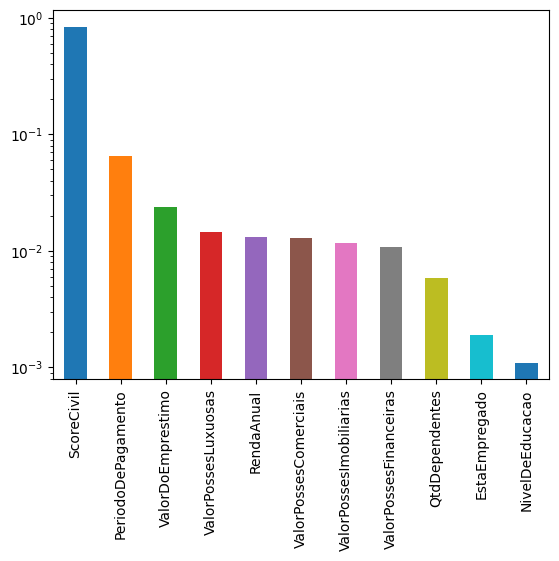

In [8]:
importancia_variaveis = pd.Series(melhor.feature_importances_, index=treino_X.columns).sort_values(ascending=False)

cmap = plt.cm.tab10
colors = cmap(np.arange(len(importancia_variaveis)) % cmap.N)

importancia_variaveis = importancia_variaveis.plot.bar(logy=True, color=colors)

display(pd.DataFrame(melhor.feature_importances_, columns=['Importância da Feature'], index=treino_X.columns).sort_values(by='Importância da Feature', ascending=False))